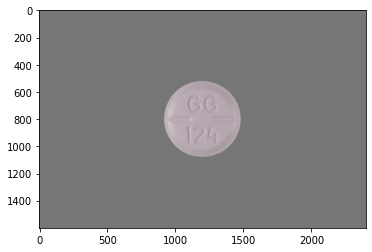

In [104]:
from skimage import io, img_as_float, filters, morphology, img_as_ubyte, feature, color
import numpy as np
import os
import matplotlib.pyplot as plt

base_dir = 'Dataset/consumer'
filename = '!0!JA4RQFVD3J7!YFH-XL918FHKJQA.JPG'
image = io.imread(os.path.join(base_dir, filename))

plt.imshow(image)

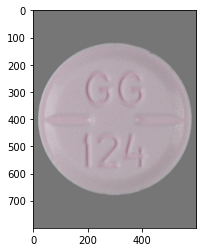

In [105]:
img = image[400:1200, 900:1500]
plt.imshow(img)

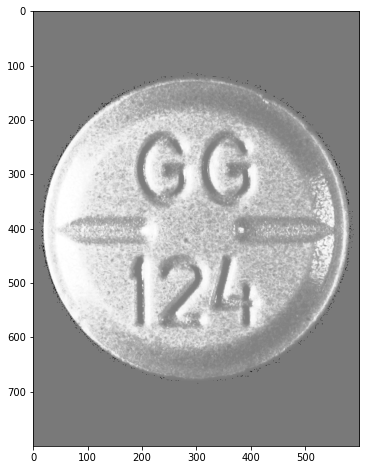

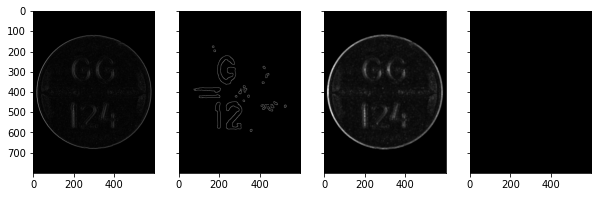

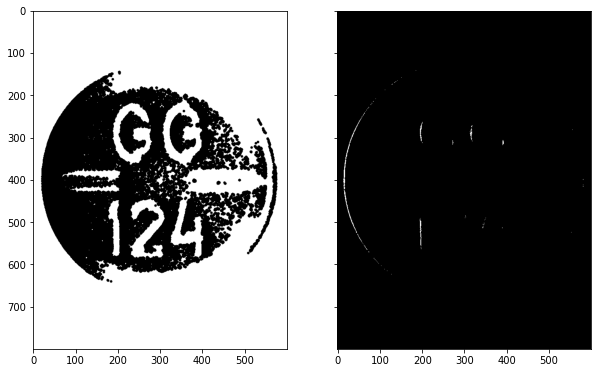

In [108]:
from scipy import ndimage as ndi
from skimage import segmentation, exposure

# Gray img
img_gs = color.rgb2gray(img)

# Equalizing
img_eq = exposure.equalize_hist(img_gs)
plt.figure(figsize=(10,8))
plt.imshow(img_eq, cmap='gray')

# apply threshold
thresh = filters.threshold_otsu(img_eq)
bw = morphology.closing(img_eq < thresh, morphology.disk(3))

# remove artifacts connected to image border
cleared = segmentation.clear_border(bw)

# Edges
img_sobel = filters.sobel(img_gs)
img_canny = feature.canny(cleared, sigma=4, low_threshold=0.2, high_threshold=0.35)

selem = morphology.disk(3)

dilated = morphology.dilation(img_canny, selem)

filled = ndi.binary_fill_holes(dilated)

fig, axes = plt.subplots(1, 4, figsize=(10,8), sharey=True)

axes[0].imshow(img_sobel, cmap='gray')
axes[1].imshow(img_canny, cmap='gray')
axes[2].imshow(dilated, cmap='gray')
axes[3].imshow(filled, cmap='gray')

window_size = 25
thresh_sauvola = filters.threshold_sauvola(img_gs, window_size=window_size)

binary_sauvola = img_gs <= thresh_sauvola

fig, axes = plt.subplots(1, 2, figsize=(10,8), sharey=True)

axes[0].imshow(bw, cmap='gray')
axes[1].imshow(binary_sauvola, cmap='gray')

In [103]:
import pytesseract

text = pytesseract.image_to_string(filled)
if text == '':
    print('None')
else:
    print(text)
    
print(pytesseract.image_to_boxes(filled))

_— y ae
ace
_ 217 0 253 0 0
— 253 0 354 0 0
y 368 0 425 0 0
a 595 0 600 0 0
e 600 0 600 0 0
a 201 0 436 0 0
c 476 0 510 0 0
e 510 0 583 0 0
